<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning3/blob/master/notebook/chap11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 27.7 MB/s eta 0:00:00


# 第11章 モデル推定

## 例題11.1

Iris データ（4次元）の次元削減を PCA と t-SNE で行ってください。結果の比較のため、散布図の表示はクラスの情報を用いてください。

In [1]:
# 11章で用いるライブラリ
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

In [2]:
%precision 3
np.set_printoptions(precision=3, suppress=True)

In [3]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

In [4]:
pca = PCA(n_components=2)  ## n_components: 削減後の次元数
X2 = pca.fit_transform(X)

In [5]:
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', '+']

def result_plot(X, y):
    counter = Counter(y)
    for t in set(y):
        plt.scatter(X[y==t,0], X[y==t,1], label=f'{t} ({counter[t]})',
                    marker=markers[t % len(markers)])
    plt.legend()
    plt.savefig('s.svg', format='svg', bbox_inches='tight')

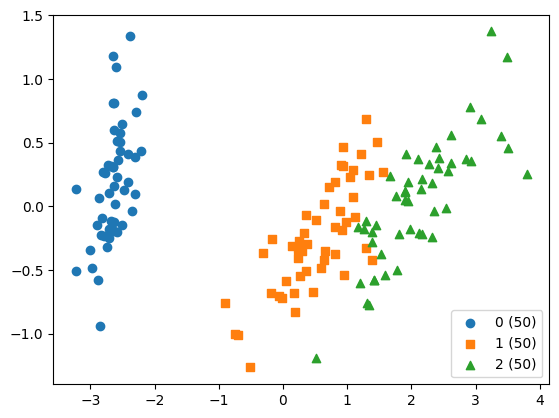

In [6]:
result_plot(X2, y)

In [7]:
print("各主成分の寄与率:", pca.explained_variance_ratio_)
print("累積寄与率:", np.cumsum(pca.explained_variance_ratio_))

各主成分の寄与率: [0.925 0.053]
累積寄与率: [0.925 0.978]


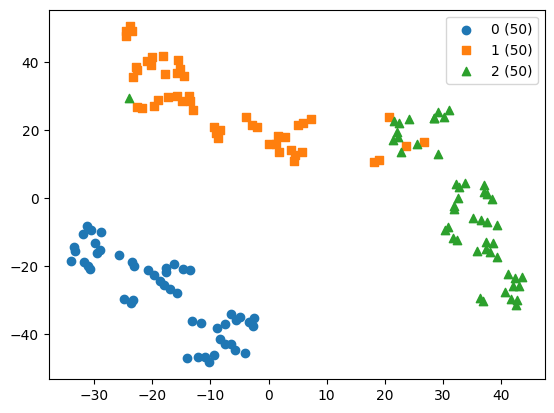

In [8]:
tsne = TSNE(perplexity=5)
X3 = tsne.fit_transform(X)
result_plot(X3, y)

## 例題11.2

Iris データから petallength（2次元目）と petalwidth（3次元目）特徴を抜き出して2次元教師なしデータを作成し，階層的クラスタリングを行って、3つのクラスタを作成してください。

In [9]:
iris = load_iris(as_frame=True)
iris_data = iris.data[['petal length (cm)', 'petal width (cm)']]
sc = StandardScaler()
X = sc.fit_transform(iris_data)

正解をプロットします。もちろんデータをまとめる処理のみではこの結果を得ることはできません。

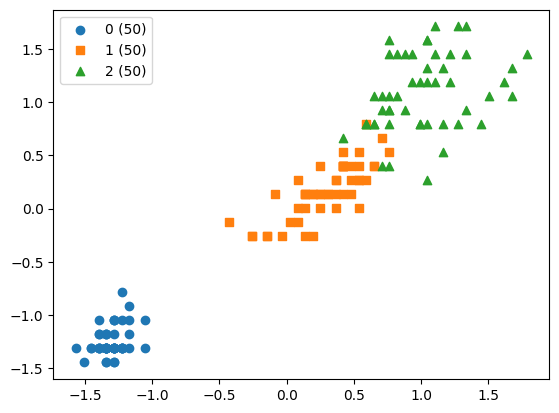

In [10]:
result_plot(X, iris.target)

### 階層的クラスタリング

[AgglomerativeClustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)を用いて階層的クラスタリングを行います。クラスタ数が3になったところで処理を止めます。

類似度はAgglomerativeClusteringの引数linkageで指定します。可能な値は'ward', 'complete', 'average', 'single' で、デフォルトは 'ward' です。

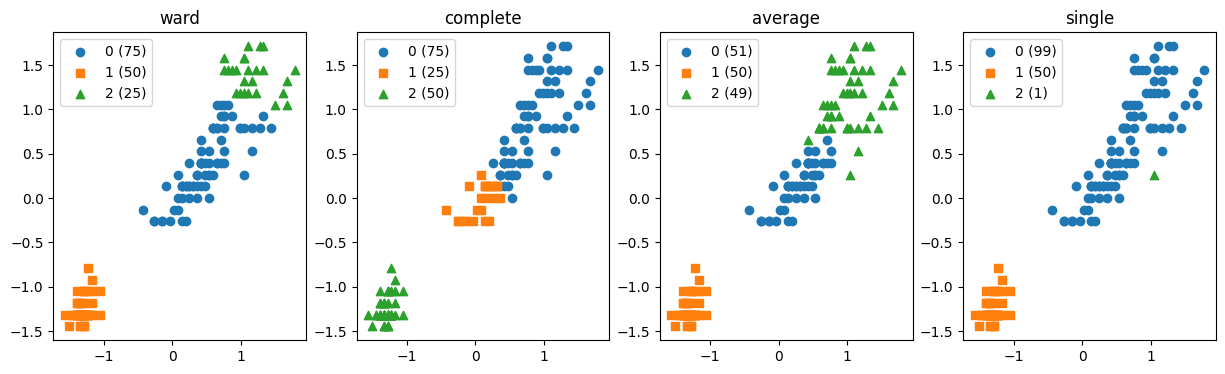

In [11]:
linkages = ['ward', 'complete', 'average', 'single']
n_clusters = 3

plt.figure(figsize=(15, 4))

for i, linkage in enumerate(linkages):
    ac = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)
    ac.fit(X)
    plt.subplot(1, 4, i + 1)
    result_plot(X, ac.labels_)
    plt.title(linkage)
plt.savefig('s.svg', format='svg', bbox_inches='tight')

## 例題11.3

[KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)を用いて分割最適化クラスタリングを行います。クラスタ数3は予め与えておく必要があります。

In [12]:
km = KMeans(n_clusters = 3, random_state=8)
km.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,8
,copy_x,True
,algorithm,'lloyd'


散布図と各クラスタのデータ数を表示して結果を確認します。

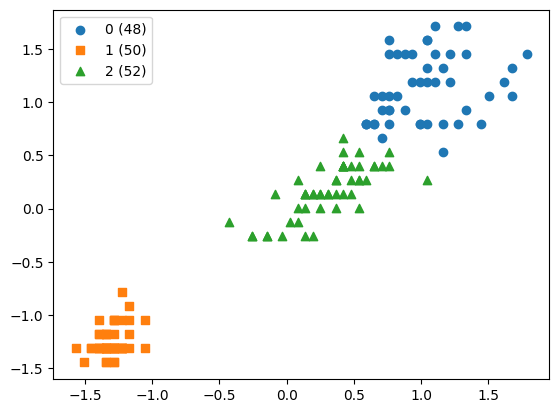

In [13]:
result_plot(X, km.labels_)

## 例題11.4

Iris データから sepallength（0次元目）と sepalwidth（1次元目）を抜き出したデータを作成し，`DBSCAN` を用いて，クラスタリングを行え．



少しクラスタがわかりにくいデータに変更します。

In [14]:
iris_data2 = iris.data[['sepal length (cm)', 'sepal width (cm)']]
X = sc.fit_transform(iris_data2)

In [15]:
X = sc.fit_transform(X)

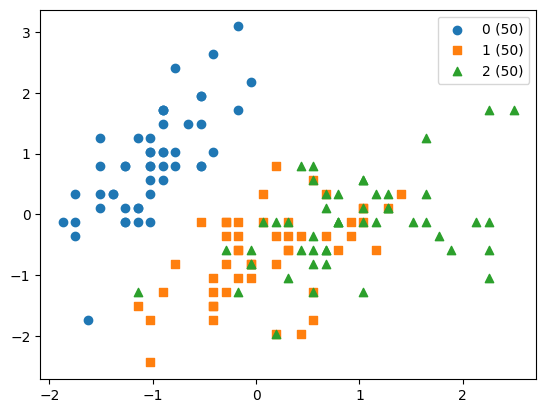

In [16]:
result_plot(X, iris.target)

DBSCANによるクラスタリング

In [17]:
db = DBSCAN(eps=0.3, min_samples=5)
db.fit(X)

,eps,0.3
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [18]:
# クラスタ数とノイズのデータ数を表示
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(f'number of clusters: {n_clusters_}')
print(f'number of noise data: {n_noise_}')

number of clusters: 2
number of noise data: 40


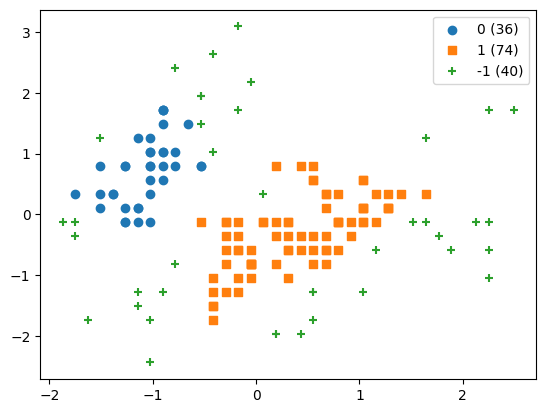

In [19]:
result_plot(X, labels)

## 例題11.5

### 確率密度推定

[GaussianMixture](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)では、EMアルゴリズムを用いて混合分布によるクラスタリングを行います。クラスタ数は3としておきます。

In [20]:
gmm = GaussianMixture(n_components=3, random_state=2)
gmm.fit(X)

,n_components,3
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,2


各正規分布のパラメータは、gmmインスタンスのmeans\_属性とcovariances\_属性にリスト形式で格納されています。

In [21]:
print('means')
print(gmm.means_)
print('covariances:')
print(gmm.covariances_)

means
[[ 1.039 -0.037]
 [-1.004  0.907]
 [ 0.092 -0.714]]
covariances:
[[[0.533 0.127]
  [0.127 0.461]]

 [[0.175 0.246]
  [0.246 0.63 ]]

 [[0.413 0.25 ]
  [0.25  0.496]]]


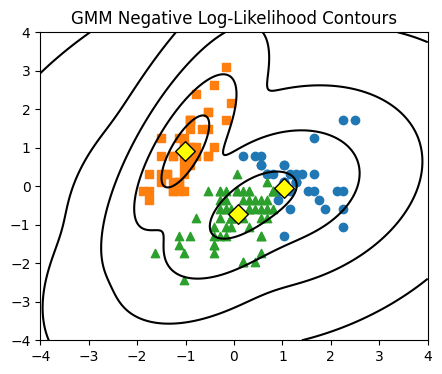

In [22]:
Y = gmm.predict(X)

# メッシュグリッドの作成と確率密度の計算
x = np.linspace(-4, 4, 500)
y = np.linspace(-4, 4, 500)
XX, YY = np.meshgrid(x, y)
Z = -gmm.score_samples(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

# プロット
plt.figure(figsize=(5, 4))
plt.contour(XX, YY, Z, np.log10(Z), levels=np.logspace(0, 3, 10), colors='k')
for i in range(3):
    plt.scatter(X[Y==i, 0], X[Y==i, 1], marker=markers[i])
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='yellow', marker='D', edgecolors='k', s=100)
plt.title("GMM Negative Log-Likelihood Contours")
plt.axis('tight')
plt.savefig('s.svg', format='svg', bbox_inches='tight')
plt.show()

## 演習問題 11-1

例題11.4で用いたデータに対して，クラス数を自動的に決定できるクラスタリング手法 `AffinityPropagation` を用いて，クラスタリングを行え．

In [26]:
# データの準備
iris = load_iris()
X = iris.data[:,0:2]
X = sc.fit_transform(X)

### クラスタ数決定の自動化 Affinity Propagation

 [AffinityPropagation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)はすべてのノード間で「類似度」と「クラスタ中心になりやすさ」の情報を交換しながらクラスタリングを行う手法です。クラスタ数（すなわちクラスタ中心の数）を事前に決める必要はありません。

In [27]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, AffinityPropagation
ap = AffinityPropagation()
ap.fit(X)

,damping,0.5
,max_iter,200
,convergence_iter,15
,copy,True
,preference,None
,affinity,'euclidean'
,verbose,False
,random_state,None


apインスタンスのcluster_centers\_属性の値は、クラスタ中心となるデータ番号のリストです。


In [28]:
ap.cluster_centers_indices_

array([  3,   7,  33,  48,  56,  79,  86,  87,  93,  96, 107, 117, 133])

散布図をプロットして結果を確認します。

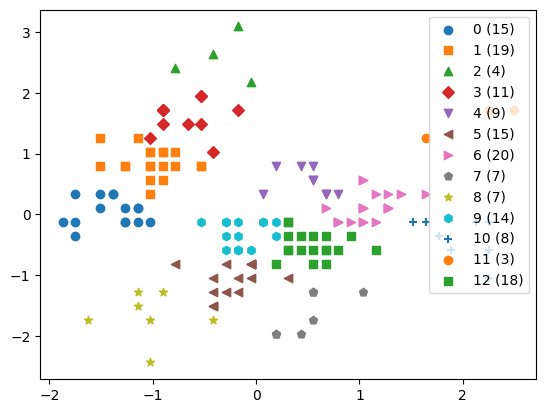

In [29]:
result_plot(X, ap.labels_)

パラメータpreferenceは各データの中心としての選ばれやすさを表すので、負の値を設定すれば、その絶対値に応じてクラスタ数が少なくなります。

In [30]:
ap2 = AffinityPropagation(preference=-50)
ap2.fit(X)

,damping,0.5
,max_iter,200
,convergence_iter,15
,copy,True
,preference,-50
,affinity,'euclidean'
,verbose,False
,random_state,None


In [31]:
ap2.cluster_centers_indices_

array([ 4, 59, 75])

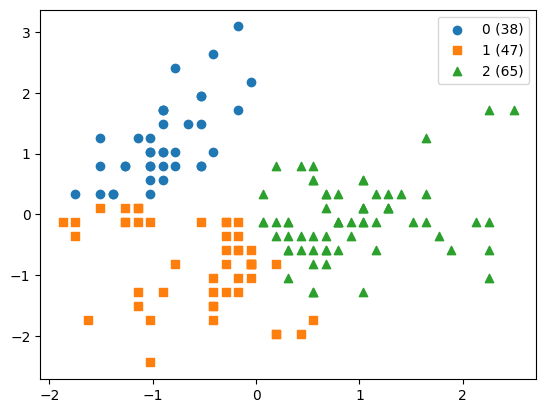

In [32]:
result_plot(X, ap2.labels_)

## 演習問題 11-2

scikit-learnのdiabetesデータに対して様々なクラスタリング手法を適用してみてください。diabetesデータは回帰用のデータ（事例数442）で、target値は 25-346 で値が高くなるほど悪化の可能性が高いことを示しています。生成したクラスタ間で、target値の平均に違いが生じているかどうかで評価を行ってください。他のクラスタと比較してtarget値の平均が突出して高くなるようなクラスタ（一定数以上の要素数をもつことが条件）を見つけることができれば成功です。

### 解答例


ライブラリの読み込み

In [33]:
import numpy as np
import pandas as pd
import altair as alt
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.mixture import GaussianMixture

データの読み込み

In [34]:
ds = load_diabetes(as_frame=True)
X = ds.data
t = ds.target
print(ds.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [35]:
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
df = pd.DataFrame(data=X2,columns=['x','y'])
df2 = pd.concat([df, t], axis=1)

主成分分析を用いてデータをプロットします。点の色の濃さがtargetの値の大きさを表すようにします。色の濃い部分と薄い部分についてある程度傾向が見えるので、試してみる可能性はありそうです。

使用したライブラリ [altair](https://altair-viz.github.io/index.html)

In [36]:
alt.Chart(df2).mark_circle(size=60).encode(
    x='x',
    y='y',
    color='target'
).interactive()

alt.Chart(...)

ターゲット値の統計値

In [37]:
print(f'ave: {np.average(t):.1f}   std: {np.std(t):.1f}')

ave: 152.1   std: 77.0


### 階層的クラスタリング

[AgglomerativeClustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)を用いて階層的クラスタリングを行います。クラスタ数を変化させて結果を観察してください。

In [38]:
ac=AgglomerativeClustering(n_clusters=5)
ac.fit(X)

,n_clusters,5
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


クラスタ毎の事例数とtarget値の平均を表示します。

In [39]:
def show_results(y, target):
  for c in set(y):
    num = np.count_nonzero(y==c)
    ave = np.average(target[y==c])
    print(f'Cluster {c}: num {num:3}, ave {ave:.1f}')

In [40]:
show_results(ac.labels_, t)

Cluster 0: num 118, ave 170.2
Cluster 1: num  84, ave 173.4
Cluster 2: num  98, ave 102.0
Cluster 3: num  83, ave 196.8
Cluster 4: num  59, ave 106.3


### k-meansクラスタリング

[KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)を用いて分割最適化クラスタリングを行います。クラスタ数は予め与えておく必要があります。

In [41]:
km = KMeans(n_clusters = 3)
km.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


クラスタ毎の事例数とtarget値の平均を表示します。

In [42]:
show_results(km.labels_, t)

Cluster 0: num 125, ave 106.0
Cluster 1: num 120, ave 133.7
Cluster 2: num 197, ave 192.6


 [AffinityPropagation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html)はすべてのノード間で「類似度」と「クラスタ中心になりやすさ」の情報を交換しながらクラスタリングを行う手法です。クラスタ数（すなわちクラスタ中心の数）を事前に決める必要はありません。

 パラメータpreferenceは各データの中心としての選ばれやすさを表すので、負の値を設定すれば、その絶対値に応じてクラスタ数が少なくなります。

In [43]:
ap=AffinityPropagation(preference=-0.3)
ap.fit(X)

,damping,0.5
,max_iter,200
,convergence_iter,15
,copy,True
,preference,-0.3
,affinity,'euclidean'
,verbose,False
,random_state,None


クラスタ毎の事例数とtarget値の平均を表示します。

In [44]:
show_results(ap.labels_, t)

Cluster 0: num  85, ave 194.0
Cluster 1: num  67, ave 182.1
Cluster 2: num  62, ave 109.2
Cluster 3: num  70, ave 105.9
Cluster 4: num  89, ave 119.0
Cluster 5: num  69, ave 199.7


### 確率密度推定

[GaussianMixture](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)では、EMアルゴリズムを用いて混合分布によるクラスタリングを行います。クラスタ数を指定する必要があります。これまでのクラスと少しメソッドが異なるので注意してください。

In [45]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=3)
gmm.fit(X)

,n_components,3
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,3


クラスタ毎の事例数とtarget値の平均を表示します。

In [46]:
show_results(gmm.predict(X), t)

Cluster 0: num 185, ave 145.9
Cluster 1: num  48, ave 232.4
Cluster 2: num 209, ave 139.2


初期値に乱数を用いるアルゴリズムは、実施毎に結果が異なります。GMMの例ではrandom_state=3で、事例数48、平均値232.4となって他とは異なる大きい値を持つクラスタが発見できていますが、他の値ではかなり異なる結果になります。

演習問題の解答としたコード



In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_diabetes

def show_results(y, target):
  for c in set(y):
    num = np.count_nonzero(y==c)
    ave = np.average(target[y==c])
    print(f'Cluster {c}: num {num:3}, ave {ave:.1f}')

X, y = load_diabetes(return_X_y=True)

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=3)
gmm.fit(X)
show_results(gmm.predict(X), y)


Cluster 0: num 185, ave 145.9
Cluster 1: num  48, ave 232.4
Cluster 2: num 209, ave 139.2
